In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches #for drawing shapes

%config InlineBackend.figure_format = 'retina'

In [4]:
df_cars = pd.read_csv("data/cars.csv")

#get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby("CYL").mean()["MPG"]

#average weight for each car with the same number of cylinders
avg_wgt = df_cars.groupby("CYL").mean()["WGT"]

#Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby("WGT").mean()["MPG"]

#Get unique list of cylinders in numerical order
cyl = sorted(df_cars["CYL"].unique())

#Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars["CYL"] == 4]["MPG"].values
cyl6 = df_cars[df_cars["CYL"] == 6]["MPG"].values
cyl8 = df_cars[df_cars["CYL"] == 8]["MPG"].values

## Annotating graphs with text and lines

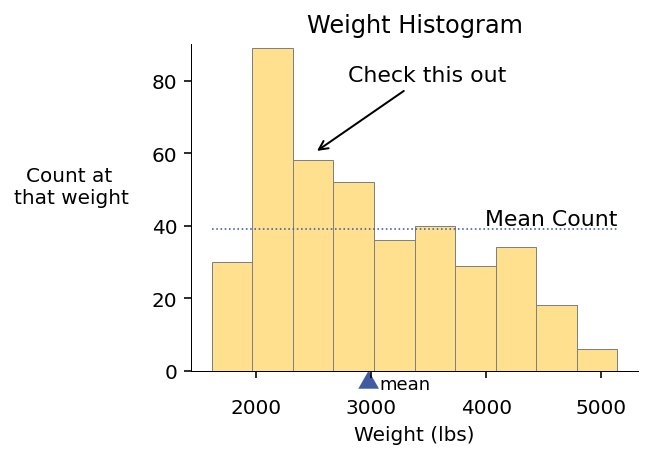

In [53]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4,3))

wgt = df_cars["WGT"]

##HISTOGRAM HERE
#save the histogram
n, bins, hpatches = ax.hist(wgt, color = "#FEE08F")
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Count at \nthat weight", rotation = 0, labelpad = 40)
ax.set_title("Weight Histogram")

#Get rid of margins and lines within the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

#Draw lines within each width of the histogram
for rect in hpatches: 
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')
    
# --------------------------------------------------------------------------------
# New stuff a horizontal line, and annotated arrow, and a wedge beneath the X axis.
# --------------------------------------------------------------------------------

#Add an arrow with text pointing to something
ax.annotate("Check this out", xy = (2500, 60), xytext = (2800, 80)
            , arrowprops = dict(color = 'black', arrowstyle='->'), 
            fontsize = 11)

#Draw a horizontal dashed line at the mean
#format is just like a regular plot going through the whole range at y point signifying the mean
ax.plot([min(wgt), max(wgt)], [np.mean(n), np.mean(n)], ":", c = "#415BA3", lw = .8)

#annotate the horizontal dashed line saying "mean count"
#format is x-point, y-point, the text, and other
ax.text(max(wgt), np.mean(n) + 1, "Mean Count", horizontalalignment = "right", fontsize = 11)

#Draw a wedge underneath the axis
#format --> create the three sides, and fill it in using patches.polygon
#add it to the ax graph
tria = [(wgt.mean(), 0), (wgt.mean() + 90, -5), (wgt.mean() - 90, -5)]
np.array(tria)
wedge = patches.Polygon(tria, closed = True, facecolor = "#415BA3")
wedge.set_clip_on(False)
ax.add_patch(wedge)

#make room for the wedge, so the ticks go bit more below the x axis line
ax.tick_params(axis = 'x', which = 'major', pad = 10)

#add text right next to the wedge
ax.text(wgt.mean() + 90, -5, "mean", fontsize = 9)

#set the wedge to be underneath the x axis line
ax.set_ylim(0, 90)

plt.show()

## Exercise 1

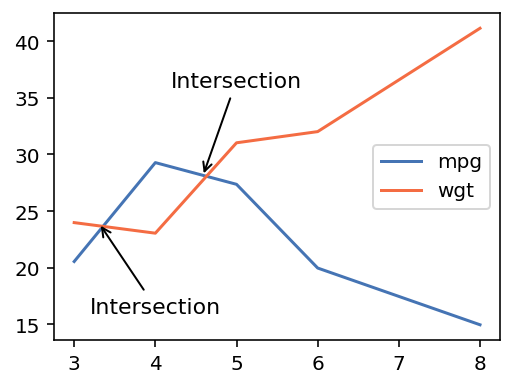

In [72]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))

#add two lines with different labels on the same plot
ax.plot(cyl, avg_mpg, c = '#4574B4', label = "mpg")
ax.plot(cyl, avg_wgt / 100, c = '#F46C43', label = 'wgt')

#add annotations
ax.annotate("Intersection", xy = (4.58, 28), xytext = (5, 36), 
            arrowprops = dict(color = 'black', arrowstyle = '->'), 
            ha = 'center', fontsize = 11)
ax.annotate("Intersection", xy = (3.3, 24), xytext = (4, 16), 
           arrowprops = dict(color = 'black', arrowstyle = '->'), 
           ha = 'center', fontsize = 11)

#add a legend
ax.legend(loc = 'center right')

plt.show()

## Adding Shapes to Graphs

In [73]:
import matplotlib.patches as patches

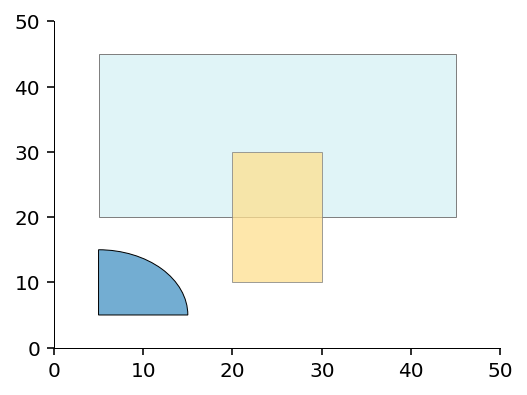

In [90]:
fig, ax = plt.subplots(figsize = (4,3))

ax.set_xlim(0, 50)
ax.set_ylim(0, 50)

rect = patches.Rectangle(xy=(5,20), width = 40, height = 25, facecolor = "#E0F4F7", 
                        linewidth = .5, edgecolor = "grey")
ax.add_patch(rect)

#alpha is the amount of brightness of the color 
rect = patches.Rectangle(xy = (20, 10), width = 10, height = 20, alpha = .75,
                        facecolor = '#FEE08F', linewidth = .5, edgecolor = 'grey')

ax.add_patch(rect)

#theta = 0 starts at the right center and theta 2 is where the circle stops
#theta2 = 360 at theta1 = 0 is the full circle
ax.add_patch( patches.Wedge(center=(5,5), r = 10, theta1 = 0, theta2 = 90, 
                           facecolor = '#73ADD2', linewidth=.5, edgecolor='black'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

## Exercise 2

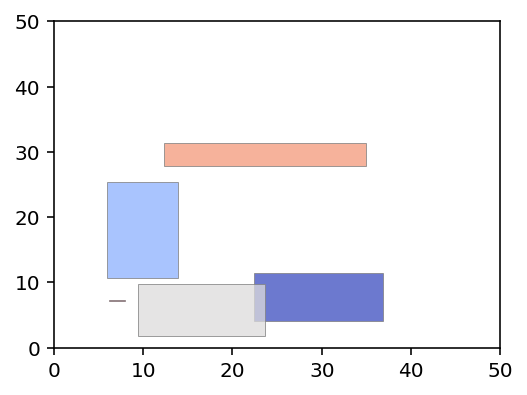

In [114]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4,3))

size = 50
ax.set_xlim(0, size)
ax.set_ylim(0, size)

n = 5

xy = np.random.rand(n, 2) * size / 1.5 #random xy coordinate
w = np.random.rand(n) * size/2 #random width
h = np.random.rand(n) * size/2 #random height

#get mapping of n colors in the coolwarm colormap
cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, num = n))

#Draw Random Rectangles
for i in np.arange(n): 
    rect = patches.Rectangle(xy = xy[i], width = w[i], height = h[i], alpha = .75,
                             facecolor = colors[i], linewidth = .5, 
                             edgecolor = "grey")
    ax.add_patch(rect)

plt.show()

## Strip Plots

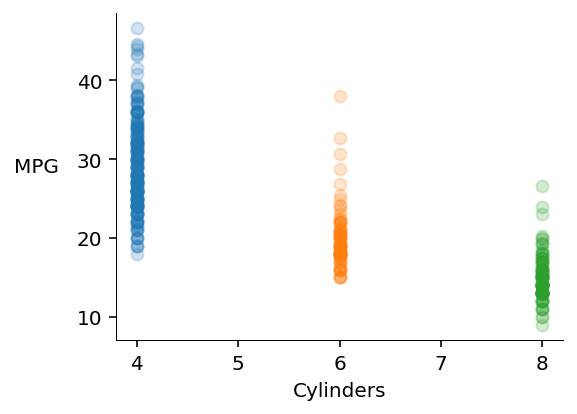

In [120]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))

ax.scatter([4] * len(cyl4), cyl4, alpha = .2)
ax.scatter([6] * len(cyl6), cyl6, alpha = .2)
ax.scatter([8] * len(cyl8), cyl8, alpha = .2)

ax.set_xlabel("Cylinders")
ax.set_ylabel("MPG", rotation = 0, labelpad = 20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

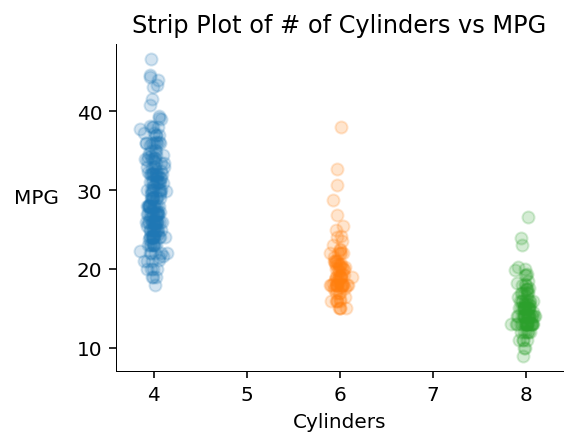

In [134]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))

#create some noise to add to the scatter plot
#Will be used to view the distribution of Miles per gallon values so that not 
# all the x values are the same (hard to see distn if all x values r the same)
sigma = 0.05
mu = 0
x_noise4 = np.random.normal(mu, sigma, size = len(cyl4))
x_noise6 = np.random.normal(mu, sigma, size = len(cyl6))
x_noise8 = np.random.normal(mu, sigma, size = len(cyl8))

ax.scatter([4] + x_noise4, cyl4, alpha = .2)
ax.scatter([6] + x_noise6, cyl6, alpha = .2)
ax.scatter([8] + x_noise8, cyl8, alpha = .2)

#Set the x-axis so that the values can all fit in 
ax.set_xlim(4 - 8 * sigma, 8 + 8 * sigma)

ax.set_title("Strip Plot of # of Cylinders vs MPG")
ax.set_xlabel("Cylinders")
ax.set_ylabel("MPG", rotation = 0, labelpad = 20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.spines['left'].set_linewidth(.5)

plt.show()

## Exercise 3

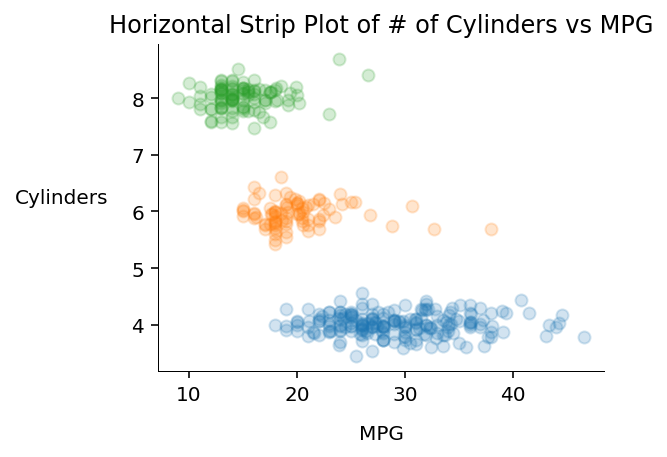

In [152]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))

#add noise
mu = 0
sigma = 0.2
y_noise4 = np.random.normal(mu, sigma, size = len(cyl4))
y_noise6 = np.random.normal(mu, sigma, size = len(cyl6))
y_noise8 = np.random.normal(mu, sigma, size = len(cyl8))

ax.scatter(cyl4, [4] + y_noise4, alpha = .2)
ax.scatter(cyl6, [6] + y_noise6, alpha = .2)
ax.scatter(cyl8, [8] + y_noise8, alpha = .2)

ax.set_title("Horizontal Strip Plot of # of Cylinders vs MPG")
ax.set_xlabel("MPG", labelpad = 10)
ax.set_ylabel("Cylinders", rotation = 0, labelpad = 35)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(.5)
ax.spines['left'].set_linewidth(.5)

plt.show()

## Line + Text Drawings

In [153]:
df_2015 = pd.read_csv("data/happy-2015.csv")
df_2016 = pd.read_csv("data/happy-2016.csv")

In [157]:
df_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [165]:
df_2015[df_2015["Country"] == "Finland"]["Happiness Score"].iloc[0]

7.406000000000001

In [166]:
#Get the happiness scores of the following countries and organize them 
countries = ["Finland", "Canada", "Norway"]
countries = ["Syria", "Togo", "Burundi"]
scores = dict()
for c in countries: 
    #without the iloc, returns a series, so to get the actual number use iloc[0]
    a = df_2015[df_2015["Country"] == c]["Happiness Score"].iloc[0]
    b = df_2016[df_2016["Country"] == c]["Happiness Score"].iloc[0]
    scores[c] = (a,b)
scores

{'Syria': (3.0060000000000002, 3.069),
 'Togo': (2.839, 3.303),
 'Burundi': (2.905, 2.905)}

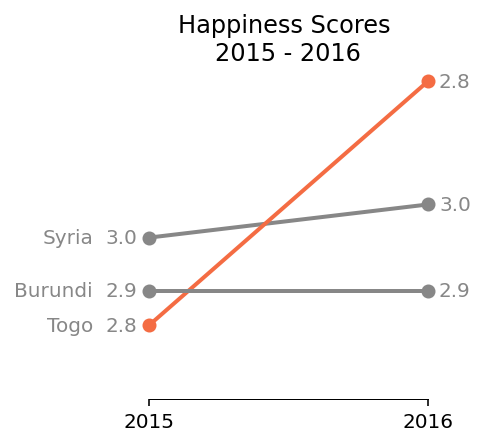

In [189]:
#Create a SlopeGraph
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 3))

ax.set_xlim(0 - .1, 1 + .1)
ax.set_ylim(2.7, 3.32)

#Draw Lines and Text Associated with Scores
for c in scores: 
    a,b = scores[c]
    color = "#878787"
    if c == "Togo": 
        color = "#F46C43"
    ax.plot([0, 1], [a, b], "o-", lw = 2, c = color)
    ax.text(0 - 0.04, a, f"{a:.1f}", color = "#878787", 
           horizontalalignment = "right", verticalalignment = 'center')
    ax.text(1 + 0.04, b, f"{a:.1f}", color = "#878787", 
            horizontalalignment = "left", verticalalignment = 'center')
    ax.text(0 - 0.2, a, c, color = "#878787", horizontalalignment = "right", 
           verticalalignment = "center")
    
#delete the margins and make the axis look right
ax.set_title("Happiness Scores \n2015 - 2016")
ax.spines['bottom'].set_bounds(0, 1) #set x_axis from 0 to 1
#set the ticks so that 2015 corresponds to 0 and 2016 corresponds to 1
ax.set_xticks([0, 1])
ax.set_xticklabels(["2015", "2016"])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)


plt.show()